<a href="https://colab.research.google.com/github/hiteshmali45/Zomato-EDA/blob/main/zomato_eda_(Hitesh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pranavuikey_zomato_eda_path = kagglehub.dataset_download('pranavuikey/zomato-eda')

print('Data source import complete.')


Data source import complete.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Cleaning:**

In [6]:
df = pd.read_csv(f'{pranavuikey_zomato_eda_path}/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [7]:
# Deleting redundant columns.

df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis=1,inplace=True)
df.head(5)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [8]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),346
listed_in(type),0


In [9]:
# Renaming the columns.
df.rename(columns={'name':'NAME','book_table':'BOOKING','listed_in(city)':'CITY','rate':'RATE','approx_cost(for two people)':'COST','listed_in(type)':'TYPES','online_order':'ONLINE_ORDER','votes':'VOTES','location':'LOCATION','rest_type':'REST_TYPE','cuisines':'CUISINES'},inplace=True)
df.head(5)

,NAME,ONLINE_ORDER,BOOKING,RATE,VOTES,LOCATION,REST_TYPE,CUISINES,COST,TYPES
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [10]:
len(df)

51717

In [11]:
# Dropping duplicates.
df=df.dropna()
df

,NAME,ONLINE_ORDER,BOOKING,RATE,VOTES,LOCATION,REST_TYPE,CUISINES,COST,TYPES
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          43533 non-null  object
 1   ONLINE_ORDER  43533 non-null  object
 2   BOOKING       43533 non-null  object
 3   RATE          43533 non-null  object
 4   VOTES         43533 non-null  int64 
 5   LOCATION      43533 non-null  object
 6   REST_TYPE     43533 non-null  object
 7   CUISINES      43533 non-null  object
 8   COST          43533 non-null  object
 9   TYPES         43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [13]:
df=df.drop_duplicates()
df

,NAME,ONLINE_ORDER,BOOKING,RATE,VOTES,LOCATION,REST_TYPE,CUISINES,COST,TYPES
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [14]:
df=df.dropna()
df

,NAME,ONLINE_ORDER,BOOKING,RATE,VOTES,LOCATION,REST_TYPE,CUISINES,COST,TYPES
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [15]:
df.loc[:,'RATE']=df['RATE'].replace("NEW|-",'0',regex=True)
df['RATE'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df.loc[:,'RATE']= df['RATE'].str.split('/5').str[0]
df['RATE'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [17]:
df.loc[:,'RATE']=df['RATE'].astype(float)
df['RATE']

,RATE
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51709,3.7
51711,2.5
51712,3.6
51715,4.3


In [18]:
df.loc[:,'COST']=df['COST'].str.replace(',','')
df['COST']

,COST
0,800
1,800
2,800
3,300
4,600
...,...
51709,800
51711,800
51712,1500
51715,2500


In [19]:
df['LOCATION'].isnull().sum()

np.int64(0)

In [20]:
df['RATE'].isnull().sum()

np.int64(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          30958 non-null  object
 1   ONLINE_ORDER  30958 non-null  object
 2   BOOKING       30958 non-null  object
 3   RATE          30958 non-null  object
 4   VOTES         30958 non-null  int64 
 5   LOCATION      30958 non-null  object
 6   REST_TYPE     30958 non-null  object
 7   CUISINES      30958 non-null  object
 8   COST          30958 non-null  object
 9   TYPES         30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [22]:
df['BOOKING'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df['BOOKING'].isnull().sum()

np.int64(0)

In [24]:
df['ONLINE_ORDER'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['ONLINE_ORDER'].isnull().sum()

np.int64(0)

In [26]:
df.isnull().sum()

,0
NAME,0
ONLINE_ORDER,0
BOOKING,0
RATE,0
VOTES,0
LOCATION,0
REST_TYPE,0
CUISINES,0
COST,0
TYPES,0


In [27]:
df.shape

(30958, 10)

**Data Visualization:**

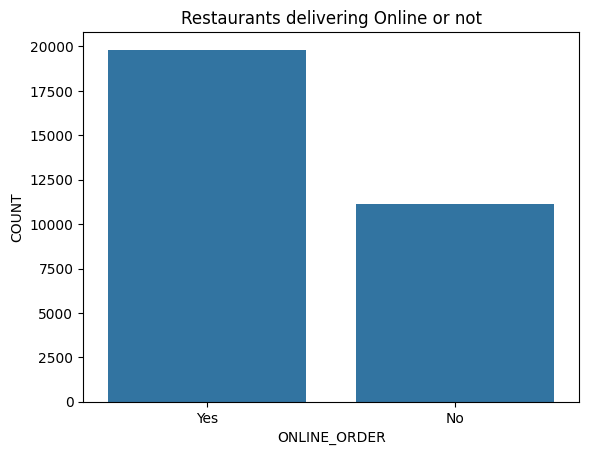

In [28]:
# 1 Restaurants delivering Online or not
sns.countplot(x='ONLINE_ORDER',data=df)
plt.xlabel('ONLINE_ORDER')
plt.ylabel('COUNT')
plt.title('Restaurants delivering Online or not')
plt.show()

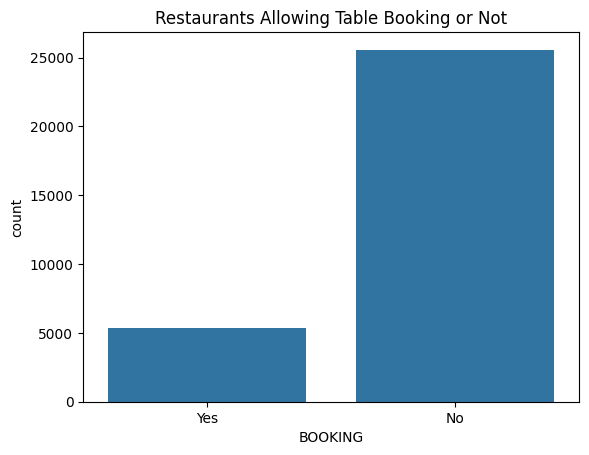

In [29]:
# 2 Restaurants allowing table booking or not
sns.countplot(x='BOOKING',data=df)
plt.title("Restaurants Allowing Table Booking or Not")
plt.show()

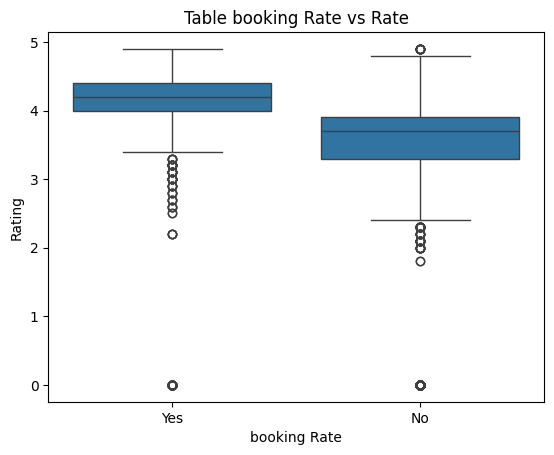

In [30]:
# 3 Table booking Rate vs Rate
sns.boxplot(x='BOOKING',y='RATE',data=df)
plt.title('Table booking Rate vs Rate')
plt.xlabel('booking Rate')
plt.ylabel('Rating')
plt.show()

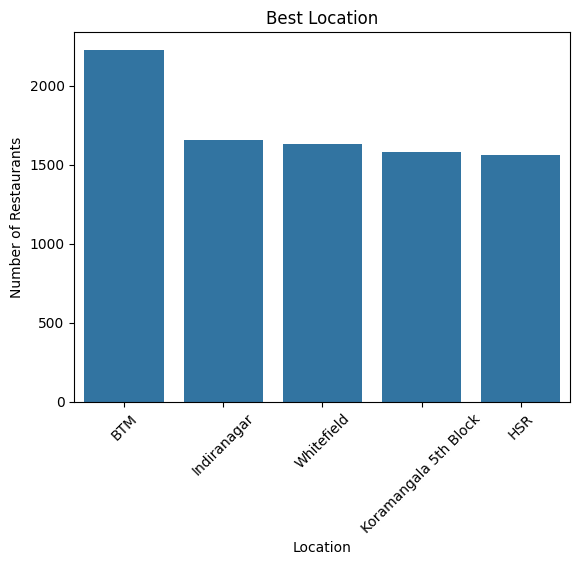

In [31]:
# 4 Best Location
location_c=df['LOCATION'].value_counts().head()
sns.barplot(y=location_c.values,x=location_c.index)
plt.ylabel("Number of Restaurants")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.title('Best Location')
plt.show()

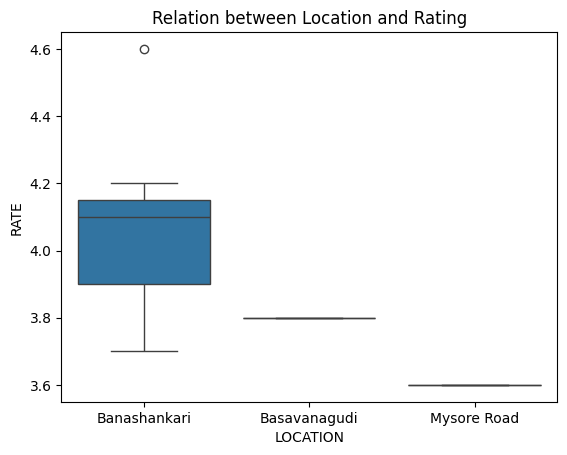

In [32]:
# 5 Relation between Location and Rating
df1=df.head(10)
sns.boxplot(x='LOCATION',y='RATE',data=df1)
plt.title("Relation between Location and Rating")
plt.show()

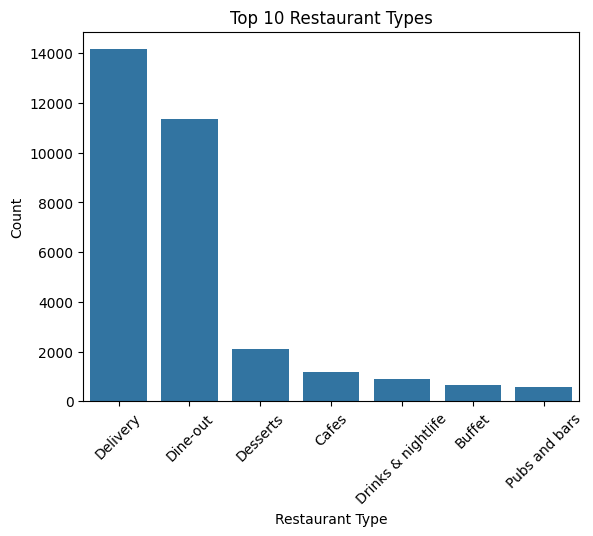

In [33]:
# 6 Restaurant Type
rest_type_counts = df['TYPES'].value_counts().head(10)
sns.barplot(x=rest_type_counts.index,y=rest_type_counts.values)
plt.title("Top 10 Restaurant Types")
plt.ylabel("Count")
plt.xlabel("Restaurant Type")
plt.xticks(rotation=45)
plt.show()

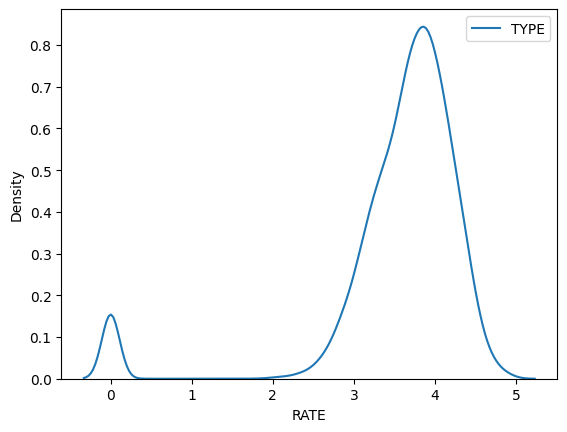

In [34]:
# 7 Gaussian Rest type and Rating
sns.kdeplot(x='RATE',data=df,label='TYPE')
plt.legend()
plt.show()

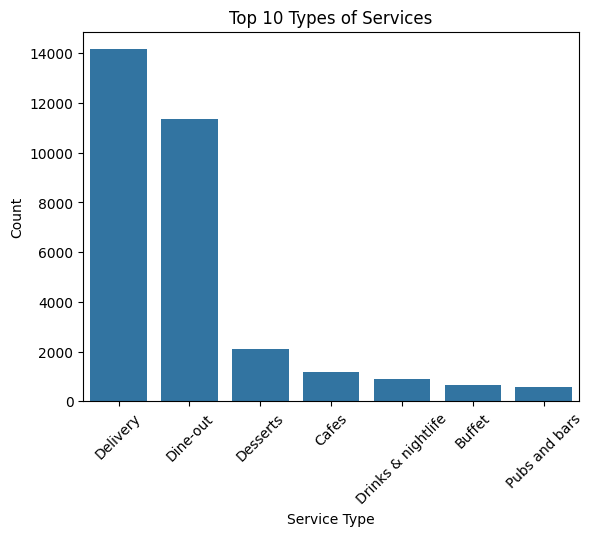

In [35]:
# 8 Types of Services
service_counts = df['TYPES'].value_counts().head(10)
sns.barplot(y=service_counts.values,x=service_counts.index)
plt.title("Top 10 Types of Services")
plt.ylabel("Count")
plt.xlabel("Service Type")
plt.xticks(rotation=45)
plt.show()


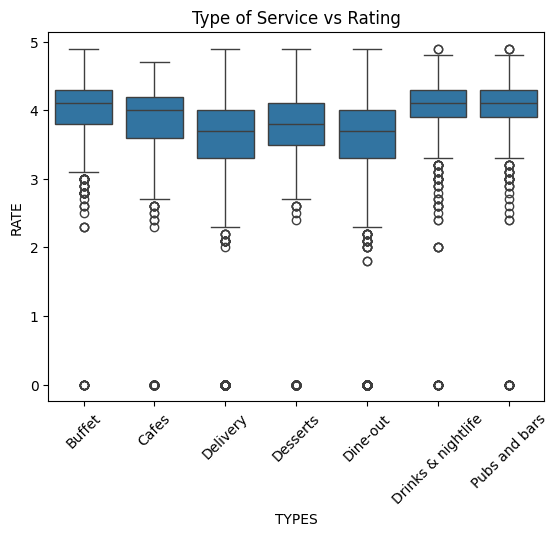

In [36]:
#  9 Relation between Type and Rating
sns.boxplot(x='TYPES',y= 'RATE', data= df)
plt.title("Type of Service vs Rating")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='COST', ylabel='Count'>

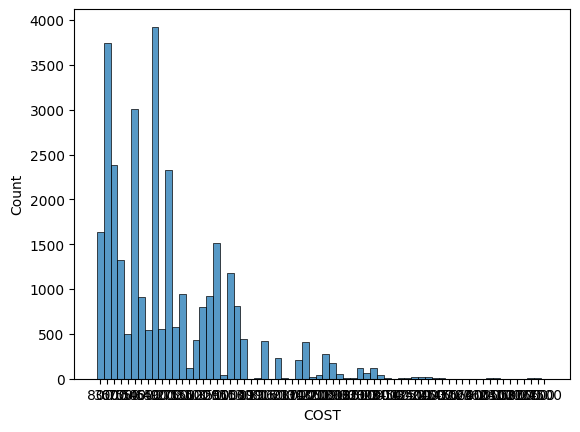

In [37]:
# 10 Cost of Restaurant
sns.histplot(df['COST'], bins= 30)

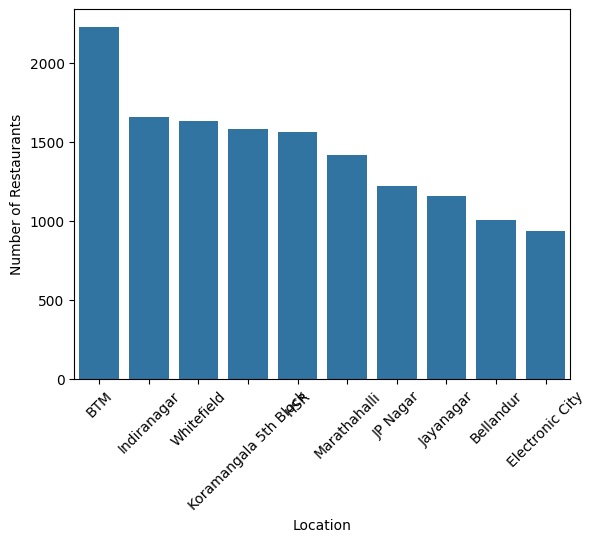

In [38]:
# 11 No. of restaurants in a Location
location_no=df['LOCATION'].value_counts().head(10)
sns.barplot(x=location_no.index,y=location_no.values)
plt.ylabel("Number of Restaurants")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()

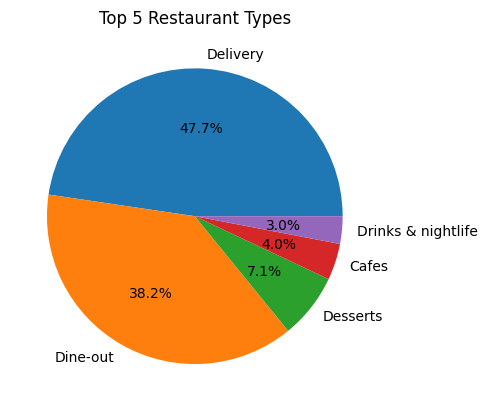

In [39]:
# 12 Restaurant type
r_type=df['TYPES'].value_counts().nlargest(5)
plt.pie(r_type,data=df,labels=r_type.index,autopct='%0.1f%%')
plt.title("Top 5 Restaurant Types")
plt.show()

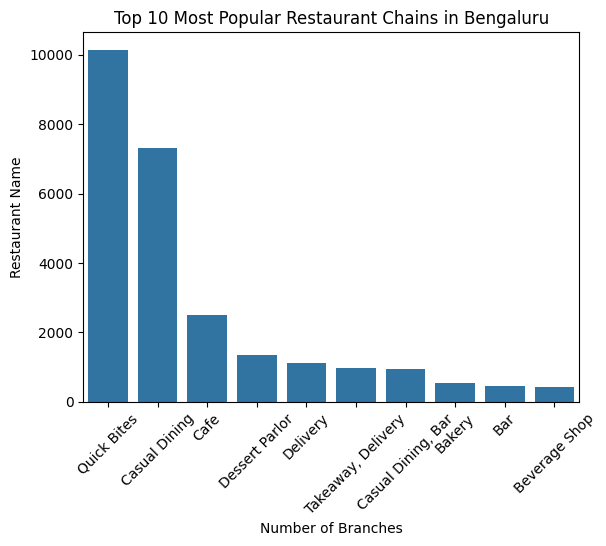

In [40]:
# 13 Most famous restaurant chains in Bengaluru
r_famous = df['REST_TYPE'].value_counts().head(10)
sns.barplot(y=r_famous.values,x=r_famous.index)
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Restaurant Chains in Bengaluru")
plt.xlabel("Number of Branches")
plt.ylabel("Restaurant Name")
plt.show()